In [1]:
''''
 DJ algorithm allows us to determine if the function is constant or balanced with just one check,
 provided we express the function as an oracle
 Four operations:
    1. XOR operation on 𝑦 = 𝑦⊕𝑓(𝑥)
    2. 𝑦⊕𝑓(𝑥)=𝑦¯
    3. 𝑦⊕𝑓(𝑥)=𝑦⊕𝑥; CNOT between x and y
    4. 𝑦⊕𝑓(𝑥)=𝑦⊕𝑥; CNOT between 𝑥¯ and y
''''

from qiskit import QuantumCircuit, Aer, execute
from random import getrandbits

In [2]:

def constant_oracle(n, circ):
    if (n == 0): # f(x) = 0
        pass
    else: # f(x) = 1
        circ.x(1)

def balanced_oracle(n, circ):
    if (n == 0):  # f(x) = x; outputs correspond to a CNOT function
        circ.cx(0, 1)
    else: # f(x) = \bar{x}
        circ.x(0)
        circ.cx(0, 1)

def random_oracle(circ):
    if(getrandbits(1) == 0):
        constant_oracle(getrandbits(1), circ)
    else:
        balanced_oracle(getrandbits(1), circ)


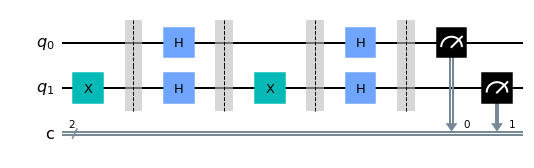

In [3]:

# Initiate a quantum circuit of two qubits
circuit = QuantumCircuit(2,2)

# Apply an X gate to 𝑞1
circuit.x(1)
circuit.barrier()

# Apply H gates to both 𝑞0 and 𝑞1
circuit.h(0)
circuit.h(1)
circuit.barrier()

# Apply the oracle to 𝑞0 and 𝑞1
random_oracle(circuit)
circuit.barrier()

# Apply H gates to both 𝑞0 and 𝑞1
circuit.h(0)
circuit.h(1)
circuit.barrier()

# Measure 𝑞0 (0 = constant; 1 = balanced)
circuit.measure([0, 1], [0, 1])

circuit.draw('mpl')


In [4]:

# Get backend
backend = Aer.get_backend('qasm_simulator')

# Run the algorithm
job = execute (circuit, backend, shots=1024)
results = job.result()
counts = results.get_counts(circuit)
print(counts)


{'10': 1024}
